## Analysis 3

#### Task 1: Predictive Modeling

- Build a regression model to predict the aggregate rating of a restaurant based on  available features.
- Split the datset into training and testing sets and evaluate the model's performance using appropriate metrices.
- Experiment with different algorithms (e.g., linear regression, deciasion trees, random forest) and comparetheir performance.

#### Task 2: Customer Preference Analysis

- Analyze the relationship between the type of cuisines and the restaurant's rating
- Identify the most popular cuisines among customers based onthe number of votes.
- Determine if there are any specific cuisines that tend to recieve higher ratings.

#### Task 3: Data Visualization

- Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).
- Compare the average ratings of differnt cuisines or cities using appropriate visualizations.
- Visualize the relationship between various features and the target variable to gain insights.s.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('Dataset.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df.shape

(9551, 21)

In [4]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.shape

(9542, 21)

In [8]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## Predictive modeling

In [9]:
df1 = df.copy()

In [10]:
df1 = df1.drop(['Restaurant ID','Restaurant Name', 'Country Code','City','Address','Locality','Locality Verbose','Longitude','Latitude','Cuisines','Currency','Rating color', 'Rating text'],axis=1)
df1.head()

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,1100,Yes,No,No,No,3,4.8,314
1,1200,Yes,No,No,No,3,4.5,591
2,4000,Yes,No,No,No,4,4.4,270
3,1500,No,No,No,No,4,4.9,365
4,1500,Yes,No,No,No,4,4.8,229


In [11]:
# encode the labels of categorical features into binary (1 for Yes and 0 for no)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Has Table booking'] = le.fit_transform(df1['Has Table booking'])
df1['Has Online delivery'] = le.fit_transform(df1['Has Online delivery'])
df1['Is delivering now'] = le.fit_transform(df1['Is delivering now'])
df1['Switch to order menu'] = le.fit_transform(df1['Switch to order menu'])
df1

,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,1100,1,0,0,0,3,4.8,314
1,1200,1,0,0,0,3,4.5,591
2,4000,1,0,0,0,4,4.4,270
3,1500,0,0,0,0,4,4.9,365
4,1500,1,0,0,0,4,4.8,229
...,...,...,...,...,...,...,...,...
9546,80,0,0,0,0,3,4.1,788
9547,105,0,0,0,0,3,4.2,1034
9548,170,0,0,0,0,4,3.7,661
9549,120,0,0,0,0,4,4.0,901


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [13]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


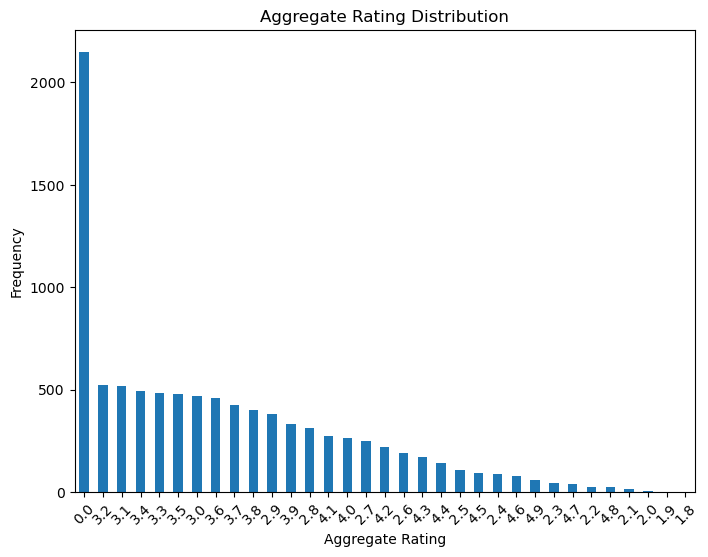

In [14]:
rating_counts = df1['Aggregate rating'].value_counts()
#plot the class distribution
plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar')
plt.title('Aggregate Rating Distribution')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

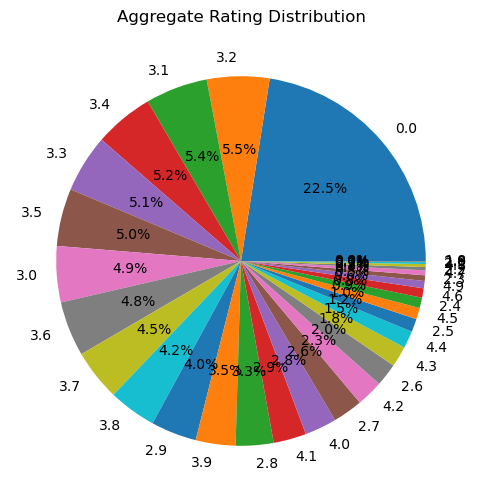

In [15]:
values = rating_counts.values
labels = rating_counts.index.astype(str)
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Aggregate Rating Distribution')
plt.show()

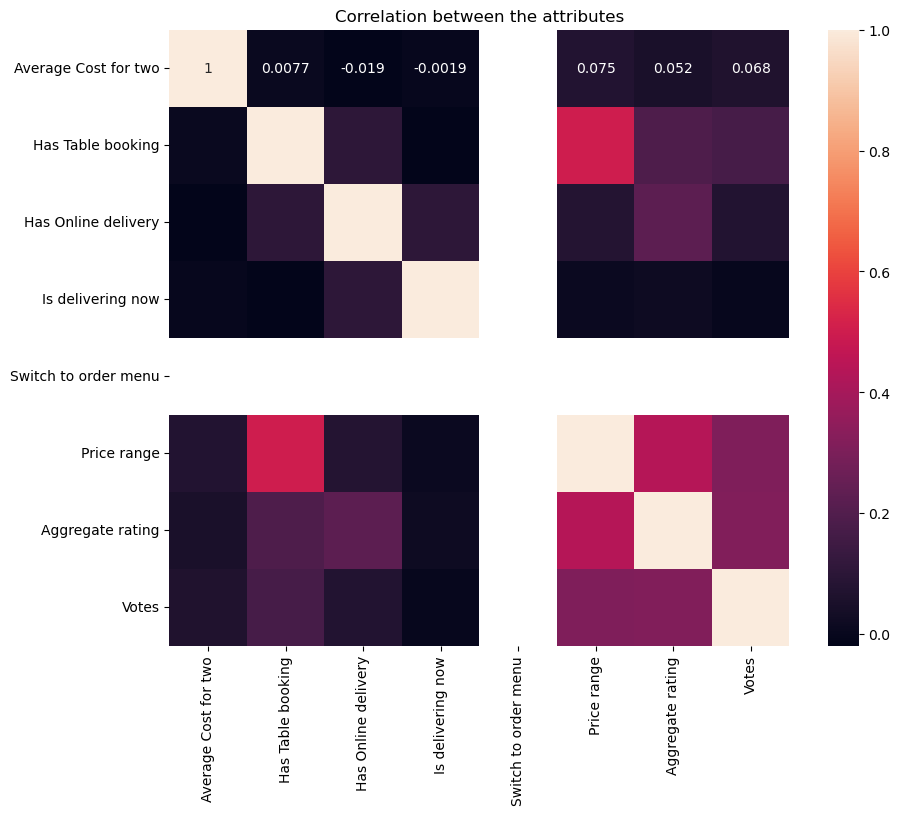

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True)
plt.title("Correlation between the attributes")
plt.show()

## Data Splitting

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df1.drop('Aggregate rating' , axis=1)
y = df1['Aggregate rating']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=250)
x_train.head()
y_train.head()

5883    3.8
5470    3.2
5790    0.0
5588    0.0
9283    4.1
Name: Aggregate rating, dtype: float64

In [20]:
print("x_train" , x_train.shape)
print("x_test" , x_test.shape)
print("y_train" , y_train.shape)
print("y_test" , y_test.shape)

x_train (7633, 7)
x_test (1909, 7)
y_train (7633,)
y_test (1909,)


### Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)
linreg_pred = linreg.predict(x_test)

In [23]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print(f"MAE of the linear regression model is: {linreg_mae:.2f}")
print(f"MSE of the linear regression model is: {linreg_mse:.2f}")
print(f"R2 score of the linear regression model is: {linreg_r2:.2f}")

MAE of the linear regression model is: 1.10
MSE of the linear regression model is: 1.75
R2 score of the linear regression model is: 0.25


### Deciasion Tree

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)
dtree_pred = dtree.predict(x_test)

In [26]:
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print(f"MAE of the decision tree model is: {dtree_mae:.2f}")
print(f"MSE of the decision tree model is: {dtree_mse:.2f}")
print(f"R2 score of the decision tree model is: {dtree_r2:.2f}")

MAE of the decision tree model is: 0.28
MSE of the decision tree model is: 0.19
R2 score of the decision tree model is: 0.92


### Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestRegressor

MAE of the Random Forest model is: 0.23
MSE of the Random Forest model is: 0.13
R2 score of the Random Forest model is: 0.95


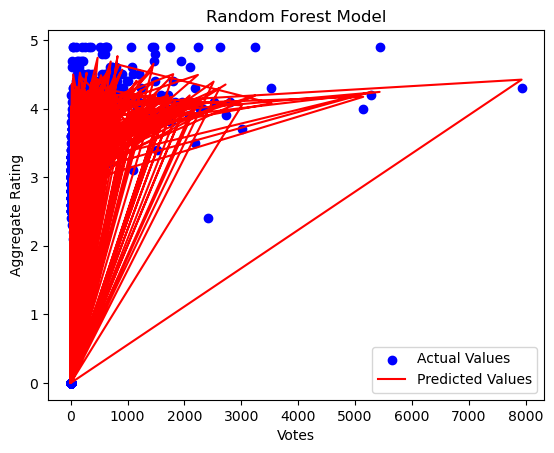

In [28]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(x_train,y_train)
y_pred_rf = random_forest.predict(x_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE of the Random Forest model is: {mae_rf:.2f}")
print(f"MSE of the Random Forest model is: {mse_rf:.2f}")
print(f"R2 score of the Random Forest model is: {r2_rf:.2f}")

# Plot the actual and predicted values
plt.scatter(x_test['Votes'], y_test, color='blue', label='Actual Values')
plt.plot(x_test['Votes'], y_pred_rf, color='red', label='Predicted Values')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.title('Random Forest Model')
plt.legend()
plt.show()
     


### Conclusion
Decision tree and Random Forest models perform much better scoring R2 scores of 92% and 95% respectively, compared to Linear Regression model of only 25% accuracy.

## Task 2: Customer Prefrence Analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [30]:
df2 = df.copy()
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [31]:
df2['Cuisines'].dtypes

dtype('O')

In [32]:
if df2['Cuisines'].dtypes !='object' :
    df2['Cuisines'] = df2['Cuisines'].astype(str)

In [33]:
df2['Cuisines'] = df2['Cuisines'].str.split(',')
df2

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"[French, Japanese, Desserts]",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,[Japanese],...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"[Seafood, Asian, Filipino, Indian]",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"[Japanese, Sushi]",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"[Japanese, Korean]",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,[Turkish],...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"[World Cuisine, Patisserie, Cafe]",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"[Italian, World Cuisine]",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,[Restaurant Cafe],...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [34]:
df3 = df2.explode('Cuisines').groupby('Cuisines')[['Aggregate rating', 'Votes']].mean().reset_index()
df3.head()

,Cuisines,Aggregate rating,Votes
0,Afghani,3.528571,109.571429
1,African,3.216667,730.333333
2,American,3.924107,693.482143
3,Andhra,4.028571,789.857143
4,Arabian,3.365217,239.739130


In [35]:
df3['Cuisines'].value_counts()

Cuisines
 Afghani          1
Goan              1
Coffee and Tea    1
Contemporary      1
Continental       1
                 ..
 Mughlai          1
 Naga             1
 Nepalese         1
 North Eastern    1
World Cuisine     1
Name: count, Length: 249, dtype: int64

In [36]:
df4 = df3.sort_values(by='Aggregate rating', ascending=False)
df4

,Cuisines,Aggregate rating,Votes
236,Sunda,4.900000,1838.000000
226,Scottish,4.700000,163.000000
25,B�_rek,4.700000,1305.000000
154,Cajun,4.700000,1412.000000
30,Caribbean,4.666667,847.666667
...,...,...,...
140,Awadhi,0.760000,18.000000
130,Afghani,0.414286,6.285714
96,Persian,0.000000,1.000000
83,Mineira,0.000000,2.000000


Cuisine
Sunda             4.900000
Scottish          4.700000
 B�_rek           4.700000
Cajun             4.700000
 Caribbean        4.666667
                    ...   
Awadhi            0.760000
Afghani           0.414286
 Persian          0.000000
 Mineira          0.000000
Cuisine Varies    0.000000
Name: Aggregate rating, Length: 249, dtype: float64


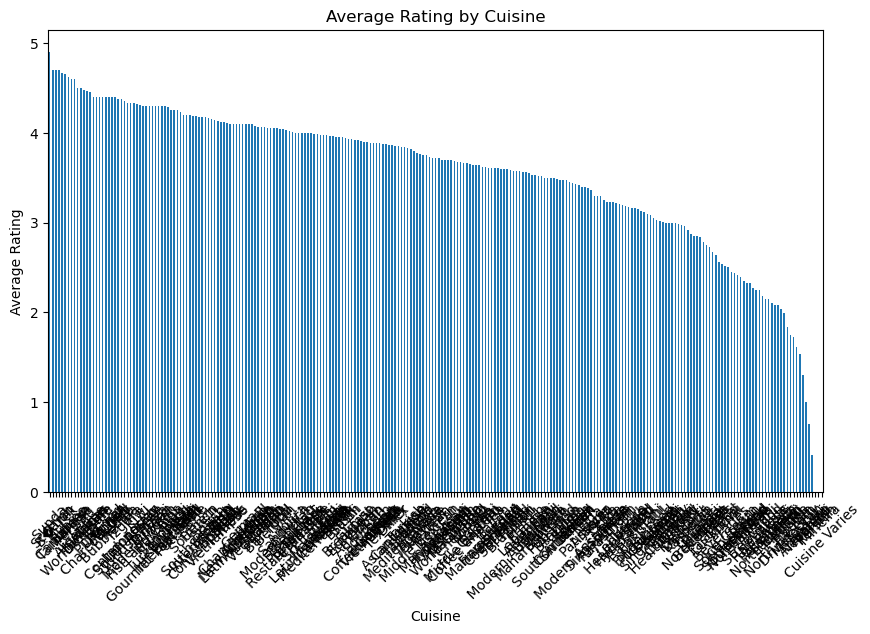

In [37]:

cuisine_rating_votes_df = pd.DataFrame(columns=['Cuisine', 'Aggregate rating', 'Votes'])

# Iterate over each row in df2
rows_list = []  
for index, row in df2.iterrows():
    cuisines = row['Cuisines']
    rating = row['Aggregate rating']
    votes = row['Votes']
    # Collect each cuisine along with the rating and votes
    for cuisine in cuisines:
        rows_list.append({'Cuisine': cuisine, 'Aggregate rating': rating, 'Votes': votes})

# Convert the list of rows into a DataFrame and concatenate with the original
cuisine_rating_votes_df = pd.concat([cuisine_rating_votes_df, pd.DataFrame(rows_list)], ignore_index=True)

# Calculate the average rating by cuisine
average_rating_by_cuisine = cuisine_rating_votes_df.groupby('Cuisine')['Aggregate rating'].mean().sort_values(ascending=False)
print(average_rating_by_cuisine)

# Plotting the average rating by cuisine
plt.figure(figsize=(10, 6))
average_rating_by_cuisine.plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Average Rating by Cuisine')
plt.xticks(rotation=45)
plt.show()


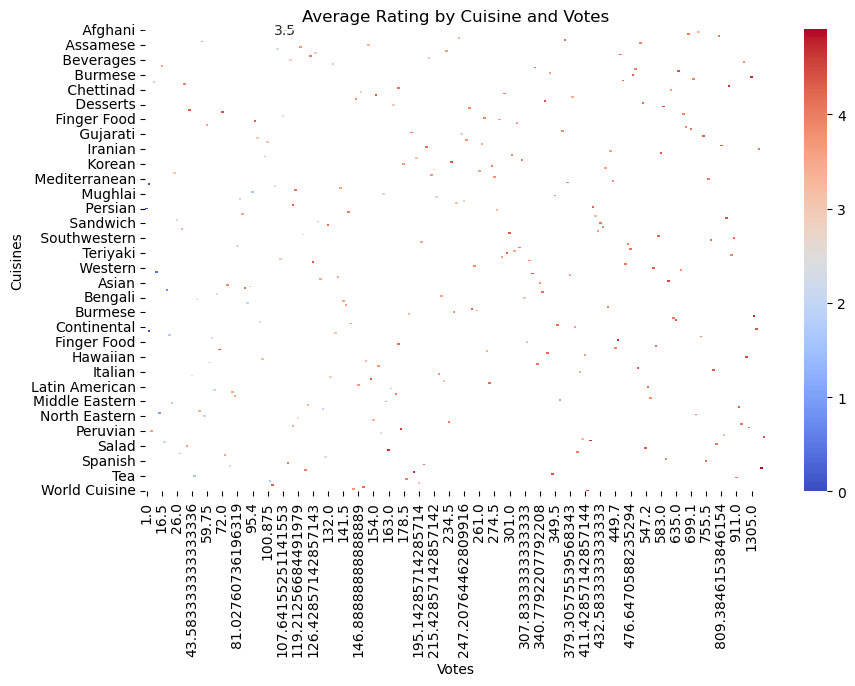

In [38]:
# heatmap of the average rating by cuisine
plt.figure(figsize=(10, 6))
sns.heatmap(df4.pivot_table(values='Aggregate rating', index='Cuisines', columns='Votes'), annot=True, cmap='coolwarm')
plt.xlabel('Votes')
plt.ylabel('Cuisines')
plt.title('Average Rating by Cuisine and Votes')
plt.show()

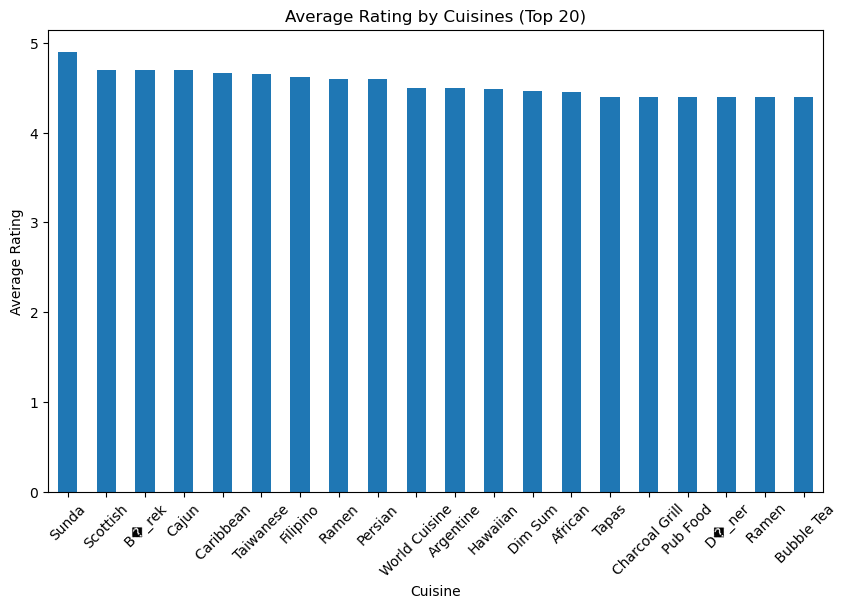

In [39]:
#calcualte the average rating for rach cuisine type
average_rating_by_cuisine = cuisine_rating_votes_df.groupby('Cuisine')['Aggregate rating'].mean().sort_values(ascending=False)
#Select the top 20 cuisines with the highest average rating
top_20_cuisines = average_rating_by_cuisine.head(20)
#plot the average rating for the top 20 cuisines
plt.figure(figsize=(10,6))
top_20_cuisines.plot(kind='bar')
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Average Rating by Cuisines (Top 20)')
plt.xticks(rotation=45)
plt.show()

In [40]:
df5 = df2.explode('Cuisines').groupby('Cuisines')[['Aggregate rating', 'Votes']].mean().sort_values(by='Votes', ascending=False).reset_index()
df5

,Cuisines,Aggregate rating,Votes
0,Pub Food,4.400000,1998.000000
1,Sunda,4.900000,1838.000000
2,Iranian,4.066667,1791.333333
3,Cuban,4.400000,1746.000000
4,Cajun,4.700000,1412.000000
...,...,...,...
244,Canadian,3.000000,6.000000
245,Peruvian,3.600000,5.000000
246,Mineira,0.000000,2.000000
247,Cuisine Varies,0.000000,2.000000


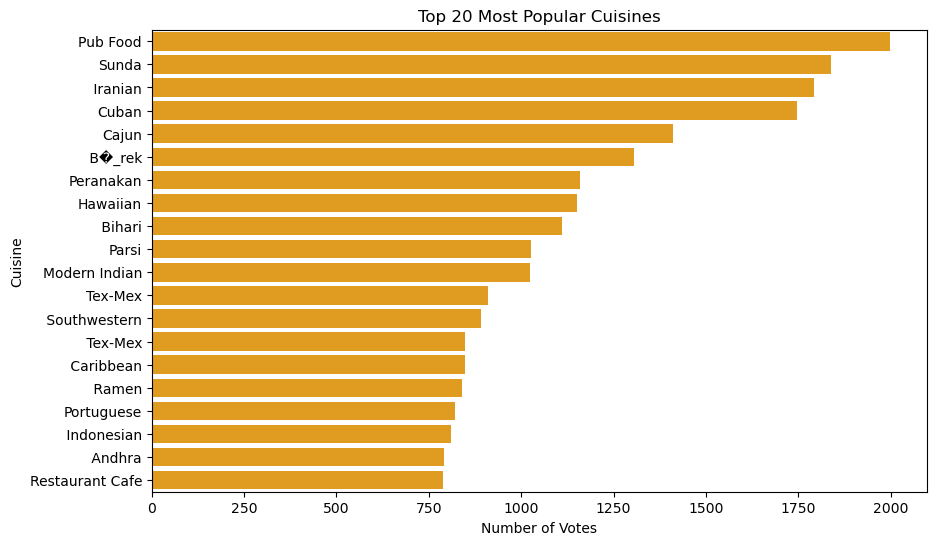

In [41]:
# bargraph of 20 most popular cusines by votes
df5 = df2.explode('Cuisines').groupby('Cuisines')[['Aggregate rating', 'Votes']].mean().sort_values(by='Votes', ascending=False).reset_index()
df5_top20 = df5.head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x='Votes', y='Cuisines', data=df5_top20, color='orange')
plt.title('Top 20 Most Popular Cuisines')
plt.xlabel('Number of Votes')
plt.ylabel('Cuisine')
plt.show()

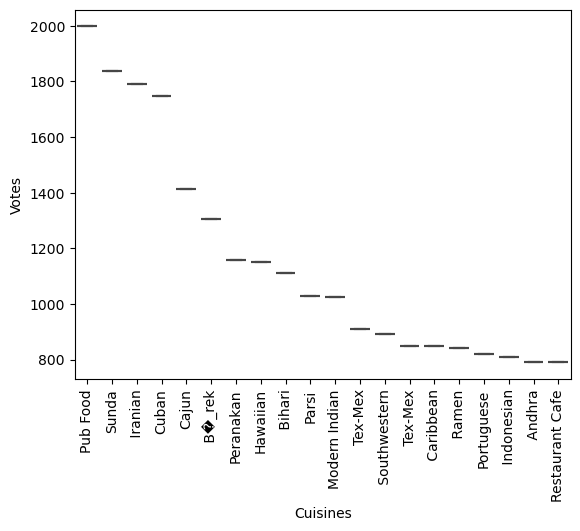

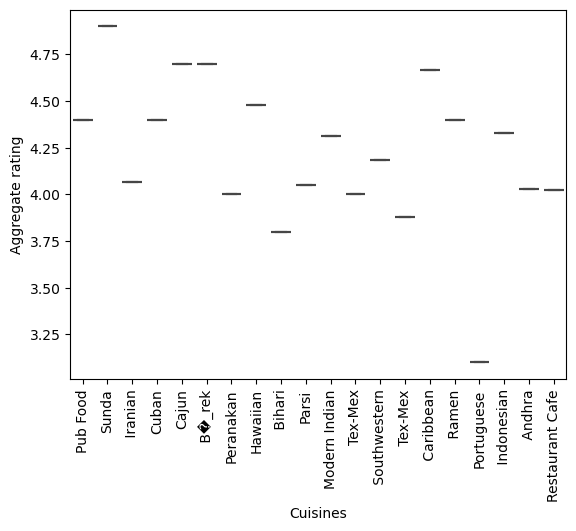

In [42]:
#box plot by rating and votes of top 20cuisines
df_top20 = df5.head(20)
sns.boxplot(x='Cuisines', y='Votes', data=df_top20)
plt.xticks(rotation=90)
plt.show()
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df_top20)
plt.xticks(rotation=90)
plt.show()

#### Task 2 Conclusion

- Visualized the relatioship between ratings and popularity of cuisines
- "Sunda" is the highest rated cuisine, followed by B�_rek, Taiwanese, Ramen and Dim Sum.
- "Sunda" is the most popular cuisine having the highest number of user votes. It is followed by Iranian, B�_rek, Peranakan and Pub Food.d.

## Task 3: Data Visualization

In [43]:
df1.columns

Index(['Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Price range',
       'Aggregate rating', 'Votes'],
      dtype='object')

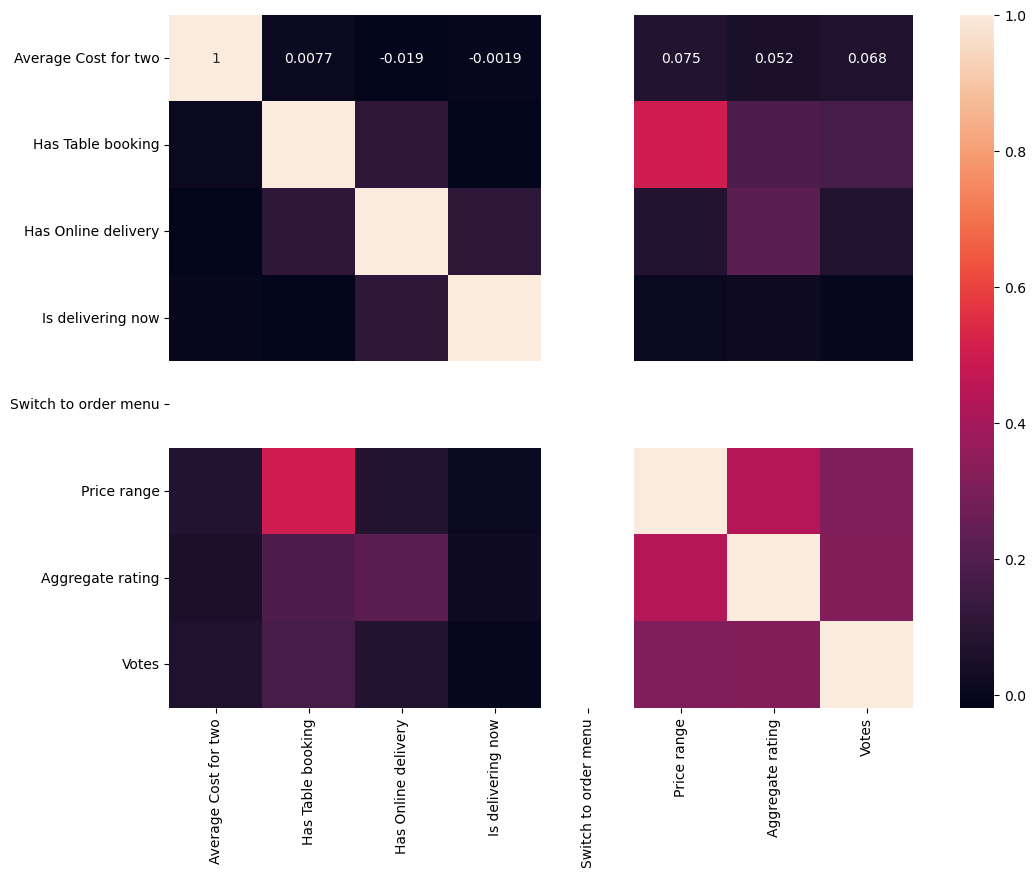

In [44]:
# heatmap to visualize relationship between rating and other attributes
plt.figure(figsize=(12, 9))
sns.heatmap(df1.corr(), annot=True)
plt.show()

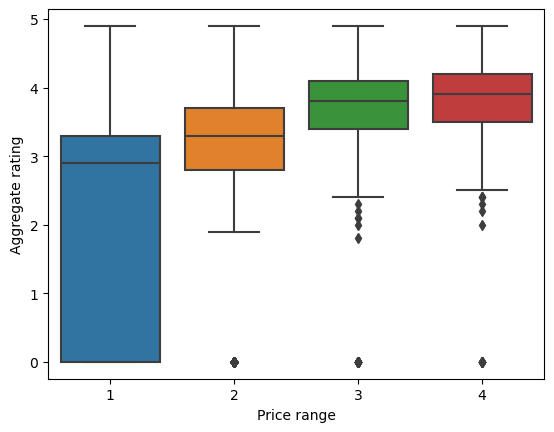

In [45]:
# visualize the relationship between rating and price ranage
sns.boxplot(x='Price range', y='Aggregate rating', data=df1)
plt.show()

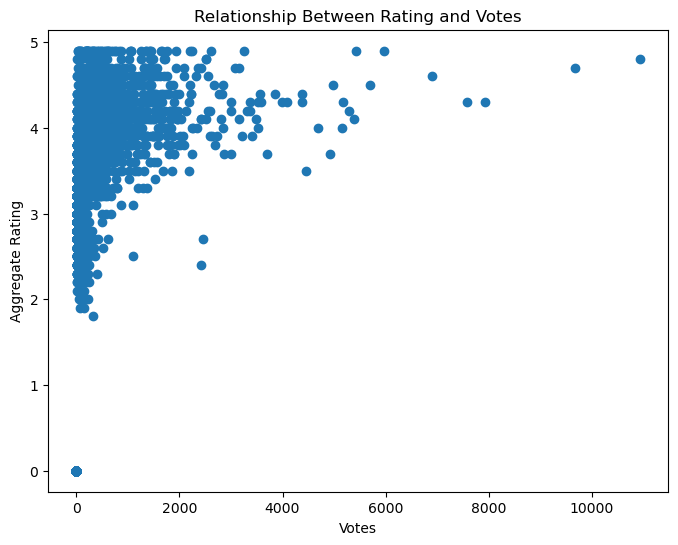

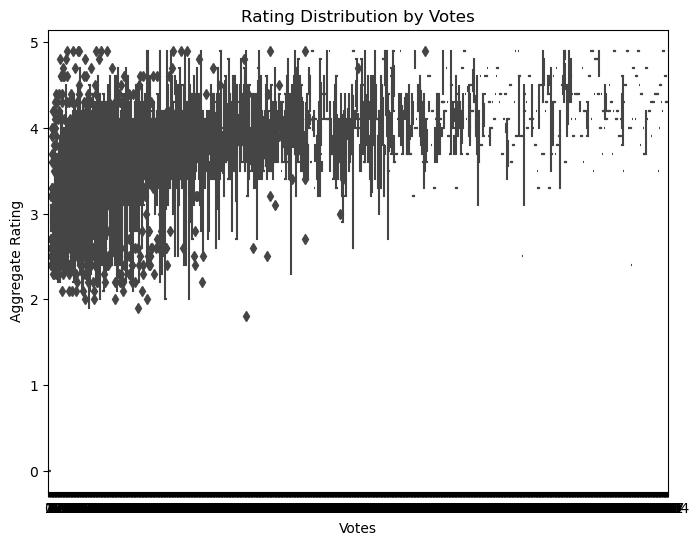

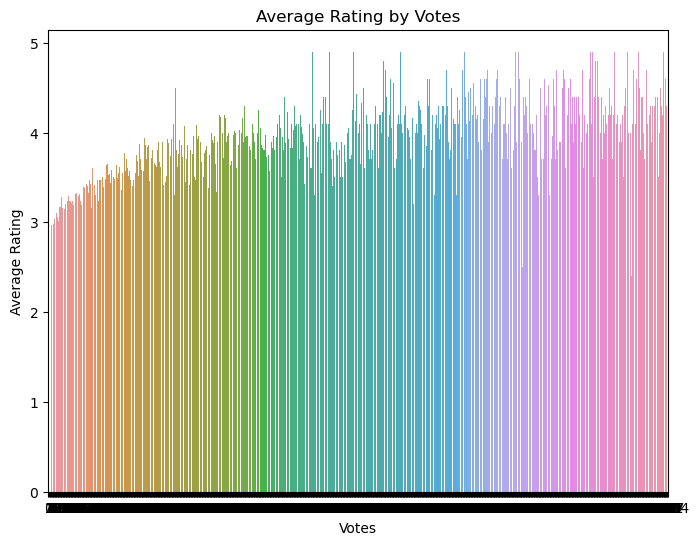

In [46]:
# visalizing the relationship between rating and votes

# Scatter plot of rating vs votes
plt.figure(figsize=(8, 6))
plt.scatter(df1['Votes'], df1['Aggregate rating'])
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.title('Relationship Between Rating and Votes')
plt.show()

# Box plot of rating by votes
plt.figure(figsize=(8, 6))
sns.boxplot(x='Votes', y='Aggregate rating', data=df1)
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.title('Rating Distribution by Votes')
plt.show()

# Bar plot of average rating by votes
average_rating_by_votes = df1.groupby('Votes')['Aggregate rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Votes', y='Aggregate rating', data=average_rating_by_votes)
plt.xlabel('Votes')
plt.ylabel('Average Rating')
plt.title('Average Rating by Votes')
plt.show()

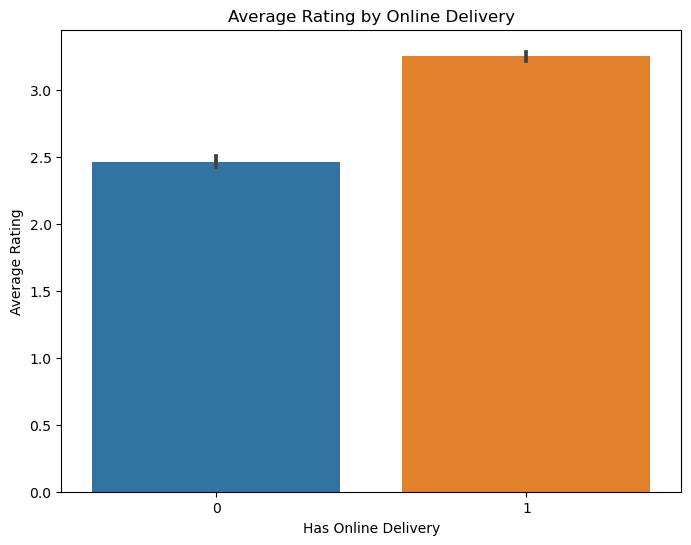

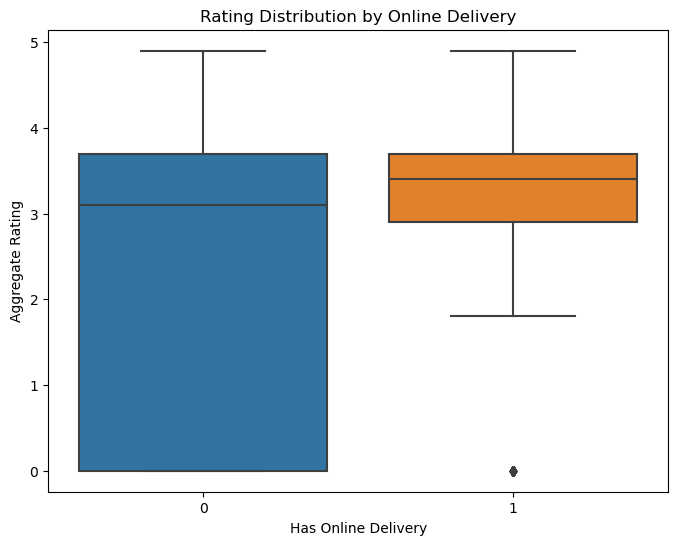

In [47]:

# visualize relationship between rating and online delivery

# Create a bar chart of average rating by online delivery
plt.figure(figsize=(8, 6))
sns.barplot(x='Has Online delivery', y='Aggregate rating', data=df1)
plt.xlabel('Has Online Delivery')
plt.ylabel('Average Rating')
plt.title('Average Rating by Online Delivery')
plt.show()

# Create a box plot of rating by online delivery
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has Online delivery', y='Aggregate rating', data=df1)
plt.xlabel('Has Online Delivery')
plt.ylabel('Aggregate Rating')
plt.title('Rating Distribution by Online Delivery')
plt.show()

In [48]:
df6 = df.copy()
df6

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [49]:
df6 = df6.drop(['Restaurant ID','Restaurant Name', 'Country Code','Address','Locality','Locality Verbose','Longitude','Latitude','Currency','Rating color', 'Rating text'],axis=1)
df6.head()

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Votes
0,Makati City,"French, Japanese, Desserts",1100,Yes,No,No,No,3,4.8,314
1,Makati City,Japanese,1200,Yes,No,No,No,3,4.5,591
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4,4.4,270
3,Mandaluyong City,"Japanese, Sushi",1500,No,No,No,No,4,4.9,365
4,Mandaluyong City,"Japanese, Korean",1500,Yes,No,No,No,4,4.8,229


In [50]:
df7 = df6[['City','Cuisines','Aggregate rating']]
df7

,City,Cuisines,Aggregate rating
0,Makati City,"French, Japanese, Desserts",4.8
1,Makati City,Japanese,4.5
2,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4.4
3,Mandaluyong City,"Japanese, Sushi",4.9
4,Mandaluyong City,"Japanese, Korean",4.8
...,...,...,...
9546,��stanbul,Turkish,4.1
9547,��stanbul,"World Cuisine, Patisserie, Cafe",4.2
9548,��stanbul,"Italian, World Cuisine",3.7
9549,��stanbul,Restaurant Cafe,4.0


In [51]:
# convert cuisine strings separated by commas into list
df7['Cuisines'] = df7['Cuisines'].str.split(',')
df7

,City,Cuisines,Aggregate rating
0,Makati City,"[French, Japanese, Desserts]",4.8
1,Makati City,[Japanese],4.5
2,Mandaluyong City,"[Seafood, Asian, Filipino, Indian]",4.4
3,Mandaluyong City,"[Japanese, Sushi]",4.9
4,Mandaluyong City,"[Japanese, Korean]",4.8
...,...,...,...
9546,��stanbul,[Turkish],4.1
9547,��stanbul,"[World Cuisine, Patisserie, Cafe]",4.2
9548,��stanbul,"[Italian, World Cuisine]",3.7
9549,��stanbul,[Restaurant Cafe],4.0


In [52]:
df8 = df7.explode('Cuisines')
df8 = df8.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
df8

,Cuisines,Aggregate rating
0,Afghani,3.528571
1,African,3.216667
2,American,3.924107
3,Andhra,4.028571
4,Arabian,3.365217
...,...,...
244,Turkish,3.171429
245,Turkish Pizza,4.300000
246,Vietnamese,4.133333
247,Western,3.700000


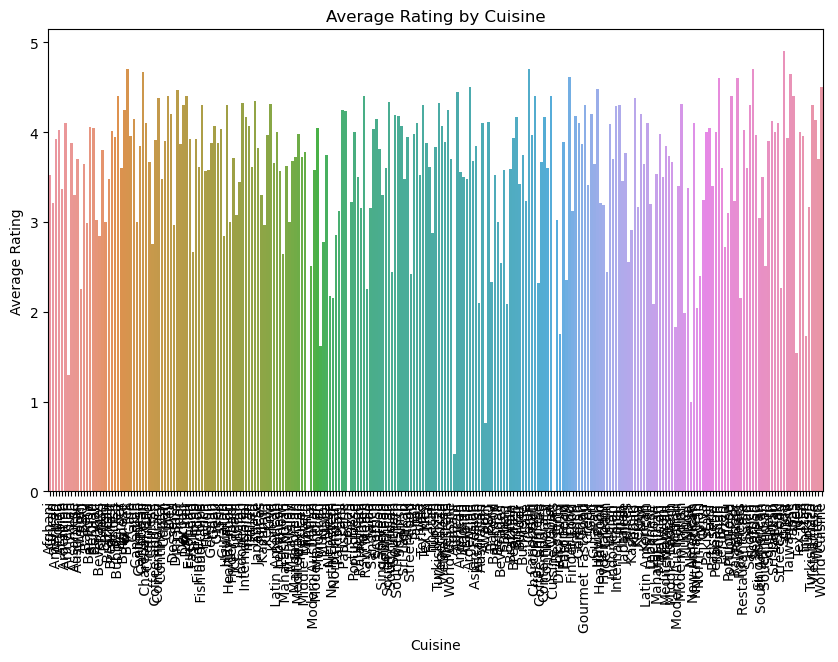

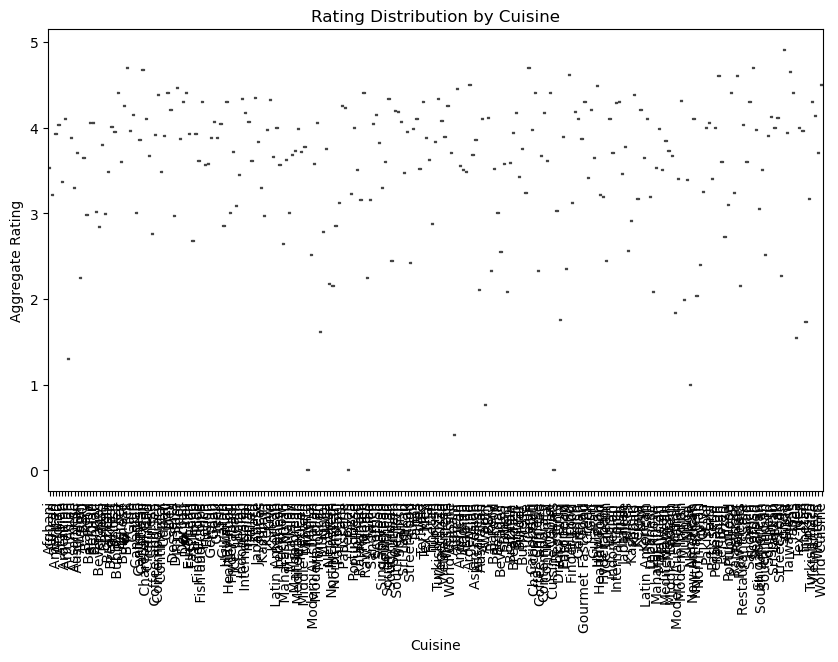

In [53]:
# Create a bar chart of average rating by cuisine
plt.figure(figsize=(10, 6))
sns.barplot(x='Cuisines', y='Aggregate rating', data=df8)
plt.xlabel('Cuisine')
plt.ylabel('Average Rating')
plt.title('Average Rating by Cuisine')
plt.xticks(rotation=90)
plt.show()

# Create a box plot of rating by cuisine
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df8)
plt.xlabel('Cuisine')
plt.ylabel('Aggregate Rating')
plt.title('Rating Distribution by Cuisine')
plt.xticks(rotation=90)
plt.show()

### Task 3: Conclusion
This is the last task of Data science internship. Here are the insights I drew from the analysis

- Ratings of restaurants are more related with their price range, votes and online delivery facility.
- Visualized the relaionship of ratings with other attributes like cuisine, city and services using boxplot, bar graph, heatmap etc.
- More descriptive and quantitative insights are already gathered in the previous levels and tasks.

## Conclusion
- Built three models to predict restaurant ratings among which two models achieved accuracy of more than 92%.
- Visualized the relationship between rating of restaurants and different services and cuisines using appropriate graphs and tools.
- Identified most popular and highest rated cuisines..